In [169]:
import numpy
import scipy
import seaborn
import pandas
import struct
import matplotlib.pyplot as plt
%matplotlib ipympl

In [170]:
plt.close()

In [171]:
data_path = "data/"

# load signal and peak positions 

with open(data_path + 'signal.npy', 'rb') as f:
    signal = numpy.load(f)
with open(data_path + 'peaks.npy', 'rb') as f:
    peaks = numpy.load(f)

In [172]:
# convert from sample number to time

fs = 50 * 1e6   # 50 MHz
peaks_s = numpy.divide(peaks, fs)
peaks_ms = numpy.multiply(peaks_s, 1e3) #to us

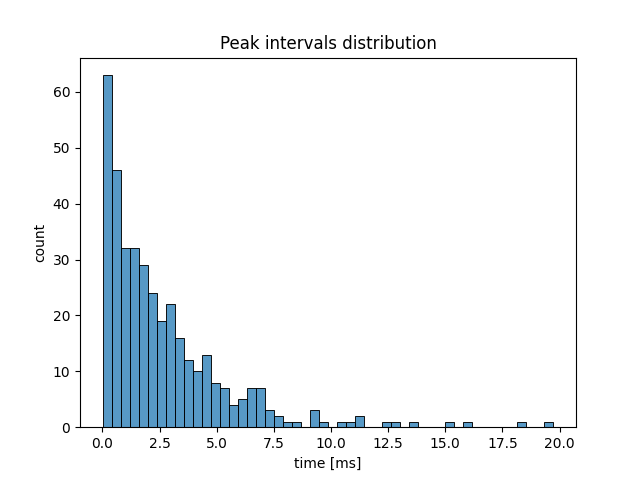

In [173]:
# rozkład odstępów 

diffs = peaks_ms[1:] - peaks_ms[:-1]

fig, ax = plt.subplots()
seaborn.histplot(diffs, kde=False, bins=50, stat="count")
plt.xlabel("time [ms]")
plt.ylabel("count")
plt.title("Peak intervals distribution")
plt.show()

In [174]:
# funkcja gestosci prawdopodobienstwa rozkladu wykladniczego:
# dla x >= 0: labda * e^(-labda*x), dla x < 0: 0

def pdf_exp(x, lmbd):
    out = lmbd * numpy.exp(-lmbd*x)
    if type(x) == numpy.ndarray:
        mask = x < 0
        out[mask] = 0
    elif x < 0:
        out = 0
    return out

In [175]:
# sprawdzic czy fgp calkuje sie do 1
pdf_with_params = lambda x: pdf_exp(x, 7)
scipy.integrate.quad(pdf_with_params, 0, numpy.inf)

(1.0, 1.0068740528394206e-11)

In [176]:
def MLE_exp(x:numpy.array) -> float:
    return len(x) / sum(x)

In [177]:
estimated_lamda = MLE_exp(diffs)
pdf_with_params = lambda x: pdf_exp(x, estimated_lamda)
print("estimated lambda for exp is: " + str(estimated_lamda))

estimated lambda for exp is: 0.3785138855916346


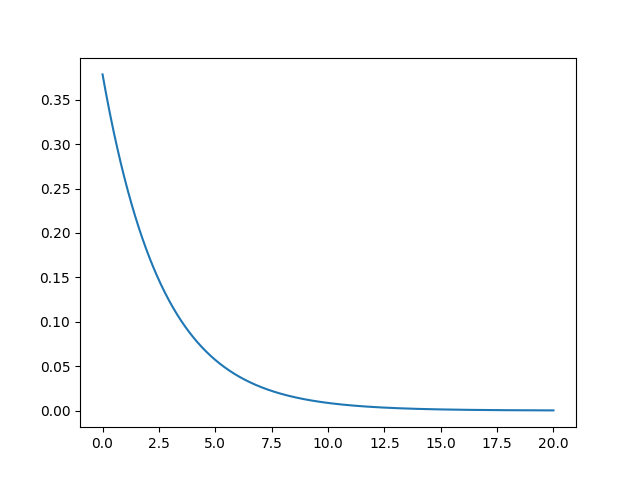

In [178]:
x_values = numpy.linspace(0, 20, 1000)
y_values = pdf_with_params(x_values)

plt.figure()
seaborn.lineplot(x=x_values, y=y_values)
plt.show()

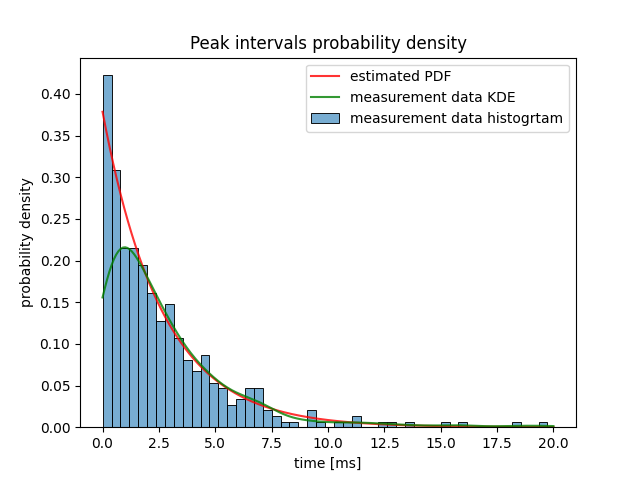

In [179]:
plt.figure()
seaborn.histplot(diffs, kde=False, bins=50, stat="density", label='measurement data histogrtam', alpha=0.6)
seaborn.lineplot(x=x_values, y=y_values, label='estimated PDF', color='red', alpha=0.8)
seaborn.kdeplot(diffs, label='measurement data KDE', color='green', clip=(0,20), alpha=0.8)
plt.legend()
plt.xlabel("time [ms]")
plt.ylabel("probability density")
plt.title("Peak intervals probability density")
plt.show()

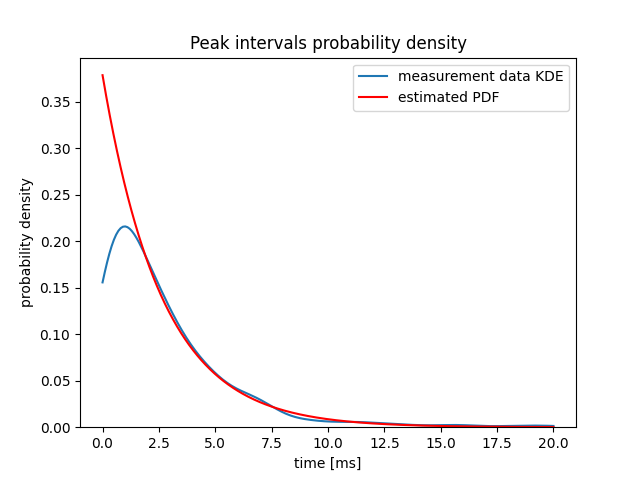

In [180]:
plt.figure()
seaborn.kdeplot(diffs, label='measurement data KDE', clip=(0,20))
seaborn.lineplot(x=x_values, y=y_values, label='estimated PDF', color='red')
plt.xlabel("time [ms]")
plt.ylabel("probability density")
plt.title("Peak intervals probability density")
plt.show()

In [181]:
min(diffs)

0.005479999999920437

In [182]:
# funkcja gestosci prawdopodobienstwa rozkladu wykladniczego ucietego:
# dla x >= x0: labda * e^(-labda*(x-x0)) x < x0: 0, gdzie x0 to próg uciecia

def pdf_cut_exp(x, lmbd, x0):
    out = lmbd * numpy.exp(-lmbd*(x-x0))
    if type(x) == numpy.ndarray:
        mask = x < x0
        out[mask] = 0
    elif x < x0:
        out = 0
    return out

In [183]:
# sprawdzic czy fgp calkuje sie do 1
x_0 = 7
pdf_cut_with_params = lambda x: pdf_cut_exp(x, 7, x_0)
scipy.integrate.quad(pdf_with_params, x_0, numpy.inf)

(0.07067967716200578, 6.777489010141124e-11)

In [184]:
def MLE_cut_exp(x:numpy.array) -> float:
    return len(x) / sum(x-min(x))

In [185]:
estimated_lamda_cut = MLE_cut_exp(diffs)
pdf_cut_with_params = lambda x: pdf_cut_exp(x, estimated_lamda_cut, min(diffs))
print("estimated lambda for cut exp is: " + str(estimated_lamda_cut))

estimated lambda for cut exp is: 0.37930065228071125


In [186]:
min(diffs)

0.005479999999920437

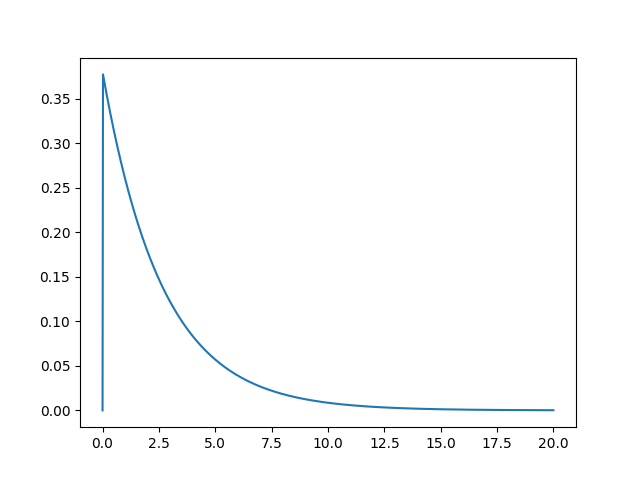

In [187]:
x_values_cut = numpy.linspace(0, 20, 1000)
y_values_cut = pdf_cut_with_params(x_values_cut)

plt.figure()
seaborn.lineplot(x=x_values_cut, y=y_values_cut)
plt.show()

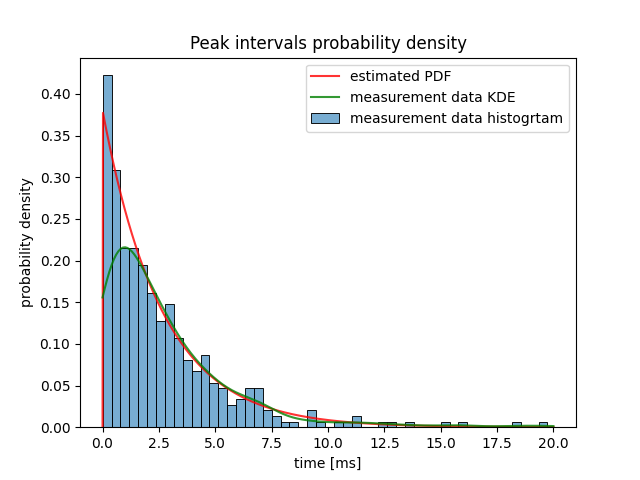

In [188]:
plt.figure()
seaborn.histplot(diffs, kde=False, bins=50, stat="density", label='measurement data histogrtam', alpha=0.6)
seaborn.lineplot(x=x_values_cut, y=y_values_cut, label='estimated PDF', color='red', alpha=0.8)
seaborn.kdeplot(diffs, label='measurement data KDE', color='green', clip=(0,20), alpha=0.8)
plt.legend()
plt.xlabel("time [ms]")
plt.ylabel("probability density")
plt.title("Peak intervals probability density")
plt.show()

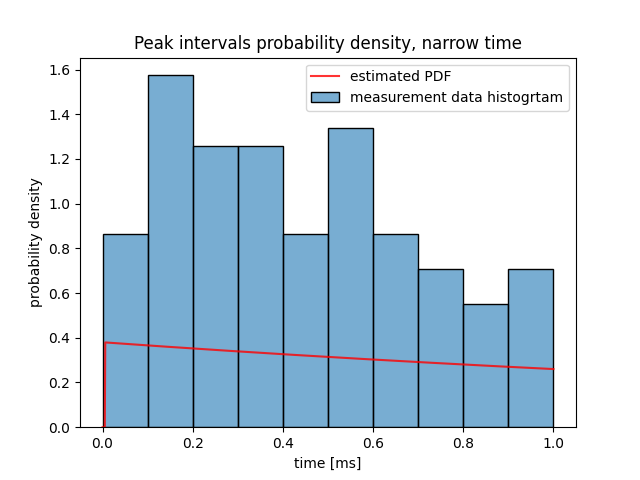

In [189]:
x_values_cut2 = numpy.linspace(0, 1, 1000)
y_values_cut2 = pdf_cut_with_params(x_values_cut2)

plt.figure()
seaborn.histplot(diffs, kde=False, bins=10, stat="density", label='measurement data histogrtam', alpha=0.6, binrange=(0,1))
seaborn.lineplot(x=x_values_cut2, y=y_values_cut2, label='estimated PDF', color='red', alpha=0.8)
#seaborn.kdeplot(diffs, label='measurement data KDE', color='green', clip=(0,20), alpha=0.8)
plt.legend()
plt.xlabel("time [ms]")
plt.ylabel("probability density")
plt.title("Peak intervals probability density, narrow time")
plt.show()

CUT dataset amove 1ms

In [191]:
diffs_abv1 = diffs[diffs >=1]

In [199]:
estimated_lamda_cut_1 = MLE_cut_exp(diffs_abv1)
pdf_cut_with_params_1 = lambda x: pdf_cut_exp(x, estimated_lamda_cut_1, 1)
print("estimated lambda for cut exp above 1ms is: " + str(estimated_lamda_cut_1))

estimated lambda for cut exp above 1ms is: 0.3663447299238092


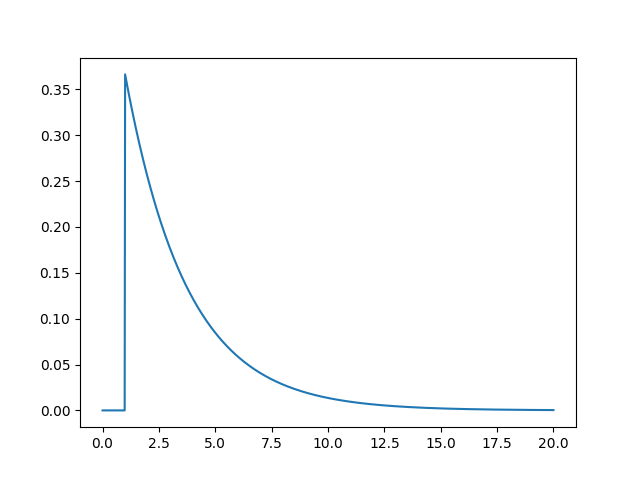

In [200]:
x_values_cut_abv1 = numpy.linspace(0, 20, 1000)
y_values_cut2_abv1 = pdf_cut_with_params_1(x_values_cut_abv1)
plt.figure()
seaborn.lineplot(x=x_values_cut_abv1, y=y_values_cut2_abv1)
plt.show()

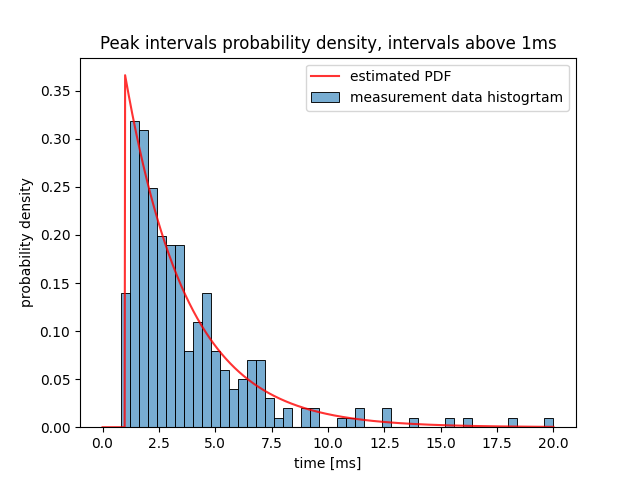

In [201]:

plt.figure()
seaborn.histplot(diffs_abv1, kde=False, bins=50, stat="density", label='measurement data histogrtam', alpha=0.6, binrange=(0,20))
seaborn.lineplot(x=x_values_cut_abv1, y=y_values_cut2_abv1, label='estimated PDF', color='red', alpha=0.8)
#seaborn.kdeplot(diffs, label='measurement data KDE', color='green', clip=(0,20), alpha=0.8)
plt.legend()
plt.xlabel("time [ms]")
plt.ylabel("probability density")
plt.title("Peak intervals probability density, intervals above 1ms")
plt.show()